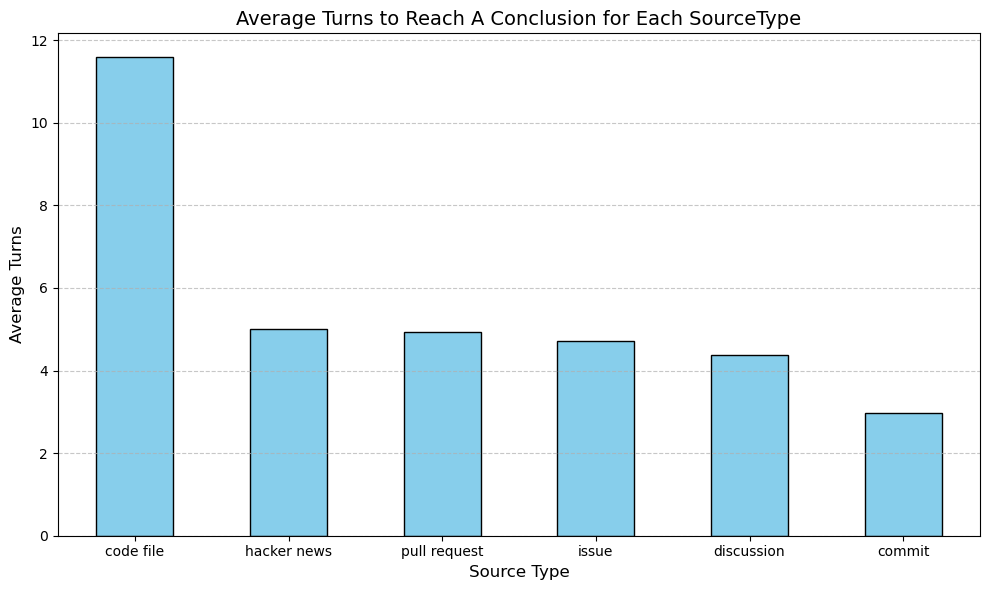

In [3]:
# Importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
import re

# Load the dataset
# Ensure the merged dataset (merged_conversations.csv) is in the same directory as the script.
data = pd.read_csv('merged_conversations.csv')


# Define a function to analyze the average turns for each source type
def analyze_average_turns(data):
    """
    Analyze the average number of turns to reach a conclusion for each SourceType.
    
    Parameters:
        data (pd.DataFrame): The input dataframe containing columns 'SourceType', 'SourceURL', and 'NumberOfPrompts'.
    
    Returns:
        pd.Series: A series containing the average turns grouped by 'SourceType', sorted in descending order.
    """
    # Remove duplicates based on specific columns
    data_unique = data.drop_duplicates(subset=['SourceType', 'SourceURL', 'NumberOfPrompts'])
    
    # Calculate the average number of prompts grouped by 'SourceType'
    average_turns = data_unique.groupby('SourceType')['NumberOfPrompts'].mean().sort_values(ascending=False)
    
    return average_turns

# Apply the classification function to the dataset
results = analyze_average_turns(data)

# Plot the distribution of average turns of each source type
plt.figure(figsize=(10, 6))
results.sort_values(ascending=False).plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Turns to Reach A Conclusion for Each SourceType', fontsize=14)
plt.xlabel('Source Type', fontsize=12)
plt.ylabel('Average Turns', fontsize=12)
_ = plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()  # Adjust layout for better appearance
plt.show()
